In [ ]:
# Imports relevant modules
%matplotlib inline
import pandas as pd 
import numpy as np 
import datetime
import seaborn as sns
from sklearn import datasets
from yellowbrick.target.feature_correlation import feature_correlation
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
from sklearn.tree import export_graphviz
import sys
from sklearn import preprocessing
from dataclasses import dataclass, field
from scipy.stats import norm, skew

In [ ]:
manhattan = pd.read_csv("manhattan.csv")
manhattan.info()
# def csv_drive_path_generatoer(url:str):
#  '''
#  Help in read csv file directly from google drive.
#  Make sure the csv format is standard.
#  url:str - path to csv file example:
#    url = 'https://drive.google.com/file/d/126JPZ3lYwdLyJ2d_7jxM9jMtZaOlF-Ld/view?usp=sharing'
#  return : str
#  '''
#  path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
#  return path

# path = csv_drive_path_generatoer('https://docs.google.com/spreadsheets/d/18kuwxxvMaWJyfr217LttC0uwxv9_2N-1tVM7eFlLQ1s/edit?usp=sharing')
# file = pd.read_csv(path)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null   object 


In [ ]:
# Check for missing values
manhattan.isnull().sum()

rental_id           0
rent                0
bedrooms            0
bathrooms           0
size_sqft           0
min_to_subway       0
floor               0
building_age_yrs    0
no_fee              0
has_roofdeck        0
has_washer_dryer    0
has_doorman         0
has_elevator        0
has_dishwasher      0
has_patio           0
has_gym             0
neighborhood        0
borough             0
dtype: int64

In [ ]:
manhattan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rental_id,3539.0,5332.589997,3311.552136,1.0,2443.5,5128.0,8149.5,11349.0
rent,3539.0,5138.940379,3162.824760,1300.0,3150.0,4000.0,6000.0,20000.0
bedrooms,3539.0,1.351936,0.967595,0.0,1.0,1.0,2.0,5.0
bathrooms,3539.0,1.366770,0.599588,0.0,1.0,1.0,2.0,5.0
size_sqft,3539.0,939.727324,477.949074,250.0,613.0,800.0,1141.0,4800.0
min_to_subway,3539.0,4.970896,5.513589,0.0,2.0,4.0,6.0,43.0
floor,3539.0,11.908307,10.960893,0.0,4.0,8.0,17.0,83.0
building_age_yrs,3539.0,51.994914,39.380433,0.0,15.0,39.0,90.0,180.0
no_fee,3539.0,0.403504,0.490669,0.0,0.0,0.0,1.0,1.0
has_roofdeck,3539.0,0.154846,0.361809,0.0,0.0,0.0,0.0,1.0


In [ ]:
manhattan_low = manhattan.loc[(manhattan['rent']<7000)]
manhattan_low.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
5,10817,3800,3.0,2,1100,3,5.0,101,0,0,0,0,0,0,0,0,Central Harlem,Manhattan
6,9077,1995,0.0,0,600,6,1.0,115,0,0,0,0,0,0,0,0,Midtown East,Manhattan


In [ ]:
importnat_columns = manhattan[['bedrooms', 'bathrooms', 'size_sqft', 'floor' , 'building_age_yrs','rent']]
importnat_columns

,bedrooms,bathrooms,size_sqft,floor,building_age_yrs,rent
0,0.0,1,480,2.0,17,2550
1,2.0,2,2000,1.0,96,11500
2,1.0,1,916,51.0,29,4500
3,1.0,1,975,8.0,31,4795
4,2.0,2,4800,4.0,136,17500
...,...,...,...,...,...,...
3534,1.0,1,532,8.0,16,4210
3535,2.0,2,988,10.0,9,6675
3536,0.0,1,250,5.0,96,1699
3537,1.0,1,651,5.0,14,3475


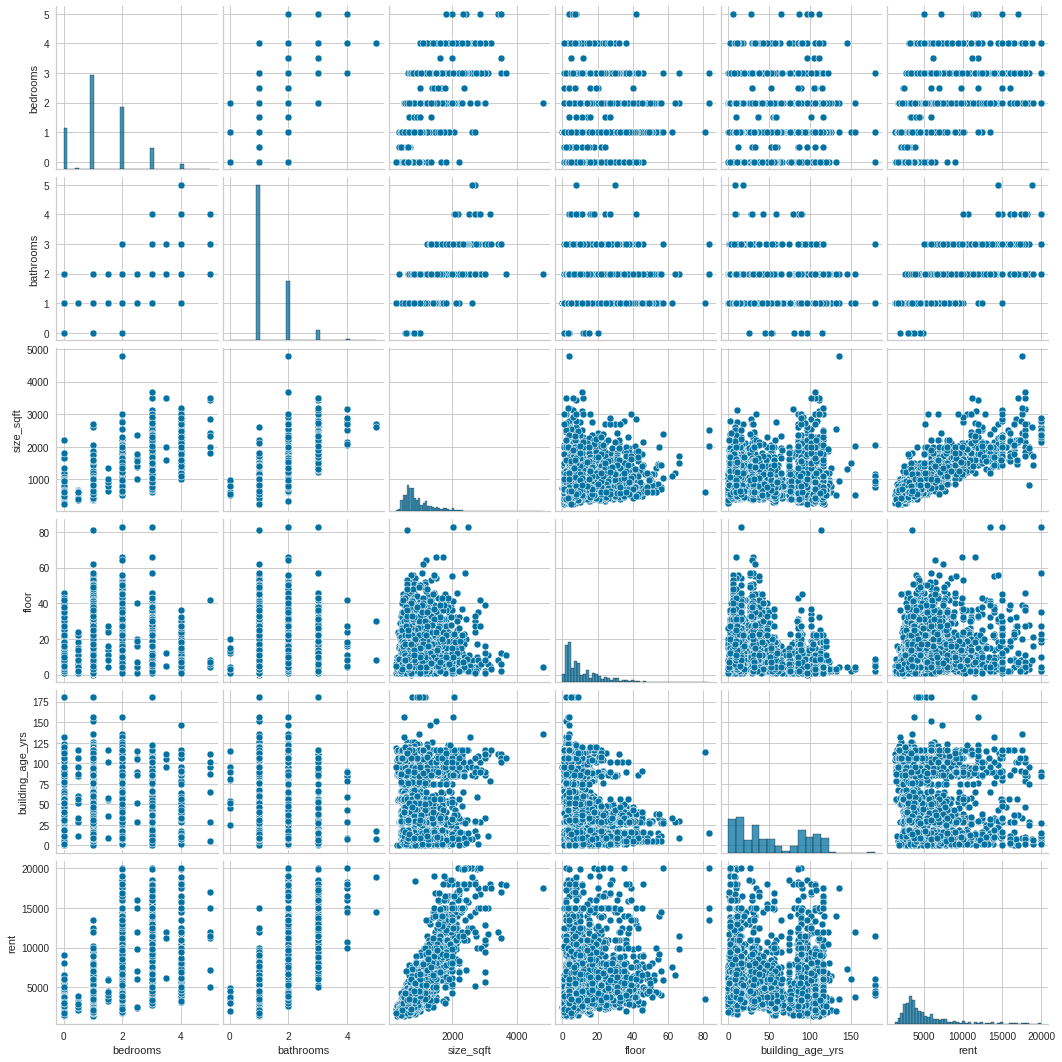

In [ ]:
sns.pairplot(importnat_columns)

In [ ]:
X = manhattan.drop('rent', axis =1)
y = manhattan['rent']

col = importnat_columns.columns
neig = manhattan.neighborhood
neig[200]

'East Harlem'

In [ ]:
#**Prepocessing the data into groups and then to dummy columns**
areas =  ['Central Park', 'Lower Manhattan', 'Midtwon','Queens','Roosevelt Island','Upper Manhattan','Village']
conditions = [manhattan['neighborhood'].isin(['Central Park South','Upper East Side','Upper West Side']),
             manhattan['neighborhood'].isin(['Battery Park City','Chinatown','Financial District','Little Italy','Tribeca']),
              manhattan['neighborhood'].isin(['Chelsea','Flatiron','Gramercy Park','Lower East Side','Midtown','Midtown East','Midtown South','Midtown West']),
              manhattan['neighborhood'].isin(['Long Island City']),
              manhattan['neighborhood'].isin(['Roosevelt Island']),
              manhattan['neighborhood'].isin(['Central Harlem','East Harlem','Hamilton Heights','Inwood','Manhattanville','Morningside Heights','Washington Heights','West Harlem']),
              manhattan['neighborhood'].isin(['East Village','Greenwich Village','Nolita','Soho','Stuyvesant Town/PCV','West Village'])             
] 
manhattan['Area'] = np.select(conditions,areas)
manhattan.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough,Area
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan,Central Park
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan,Village
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan,Midtwon
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan,Village
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan,Village


In [ ]:

manhattan_groups = manhattan_low.drop(['rental_id','neighborhood', 'borough'],axis=1, inplace=False)
manhattan_groups =  pd.get_dummies(manhattan_groups)
manhattan_groups.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1
5,3800,3.0,2,1100,3,5.0,101,0,0,0,0,0,0,0,0
6,1995,0.0,0,600,6,1.0,115,0,0,0,0,0,0,0,0


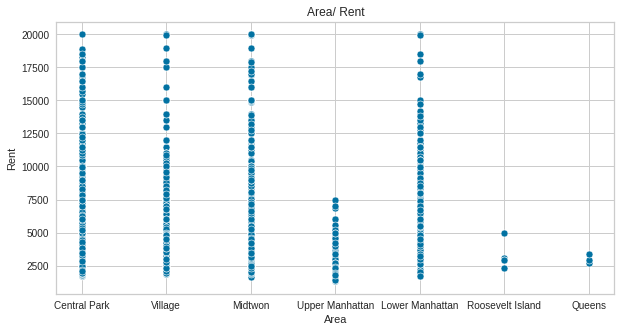

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,5))
sns.scatterplot(data=manhattan, x='Area',y='rent').set_title('Area/ Rent')
plt.xlabel("Area")
plt.ylabel("Rent")
plt.show()

In [ ]:
#**Prepocessing the data by adding targeting:**
#The targeting splits to 3 options  - by mean, median or standard deviation. 

manhattan_targeting = manhattan.drop(['rental_id','Area', 'borough'],axis=1, inplace=False)

In [ ]:
def target_encoder(df, column, target, index=None, method='mean'):
  index = df.index if index is None else index # Encode the entire input df if no specific indices is supplied

  if method == 'mean':
      encoded_column = df[column].map(df.iloc[index].groupby(column)[target].mean())
  elif method == 'median':
      encoded_column = df[column].map(df.iloc[index].groupby(column)[target].median())
  elif method == 'std':
      encoded_column = df[column].map(df.iloc[index].groupby(column)[target].std())
  else:
      raise ValueError("Incorrect method supplied: '{}'. Must be one of 'mean', 'median', 'std'".format(method))

  return encoded_column
   

In [ ]:
labelencoder = preprocessing.LabelEncoder()
manhattan_targeting['neighborhood_encoded'] = labelencoder.fit_transform(manhattan_targeting['neighborhood'])

manhattan_targeting['neighborhood_encoded']=target_encoder(manhattan_targeting,'neighborhood','rent',index=None,method='mean')

In [ ]:
manhattan_targeting.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,neighborhood_encoded
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,5519.004000
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,5471.424242
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,5930.672269
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,5471.424242
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,8467.655172


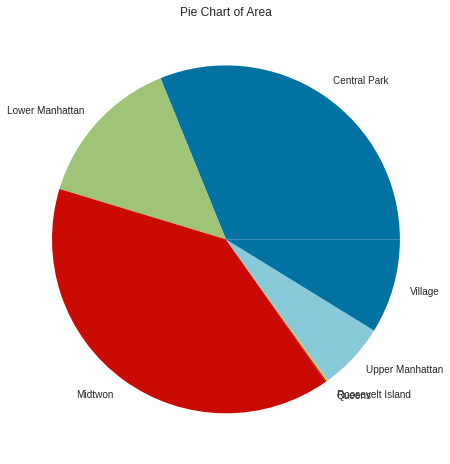

In [ ]:
#Visualizing the values in 'Area'
pieplot = manhattan.groupby('Area').size()

pieplot.plot(kind='pie', subplots=True, figsize=(8, 8), fontsize=10)
plt.title("Pie Chart of Area")
plt.ylabel('')
plt.rcParams["figure.figsize"] = [25, 15]

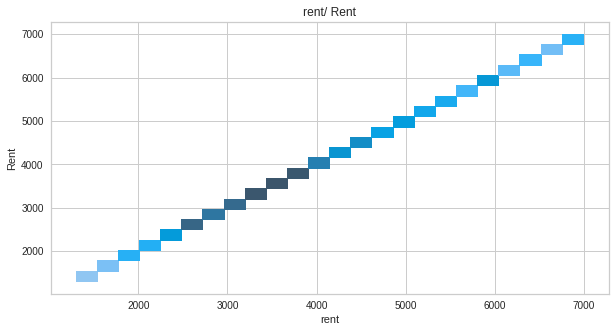

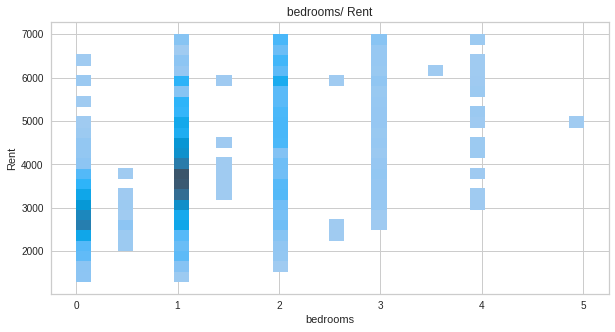

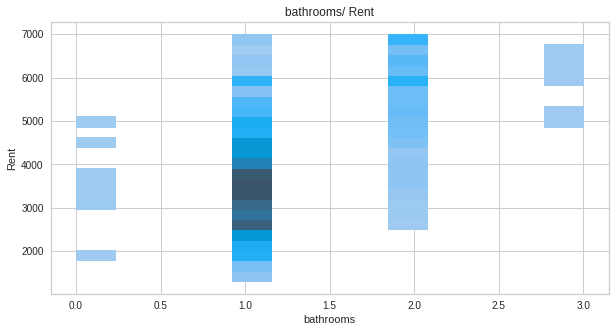

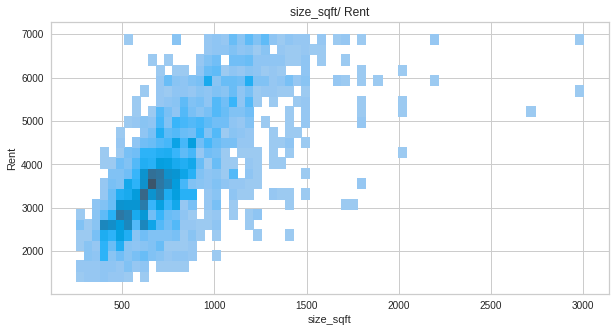

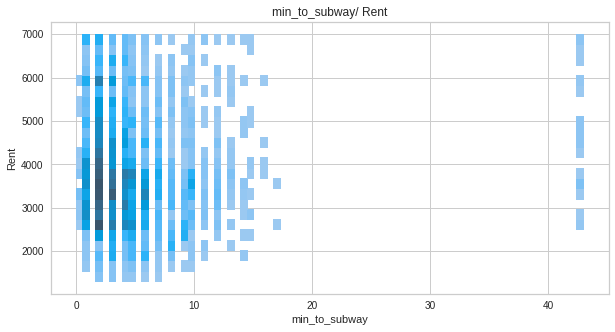

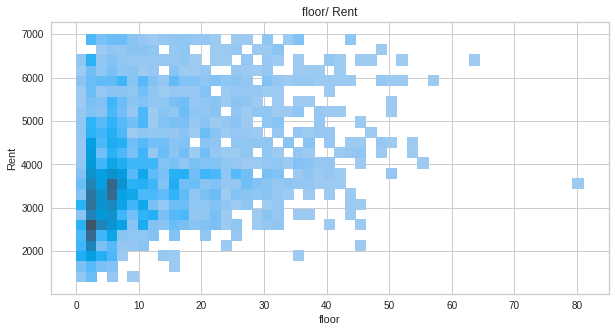

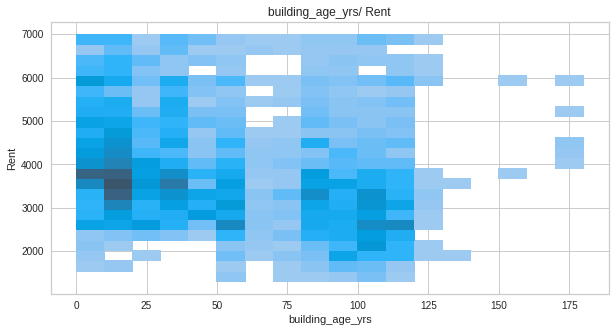

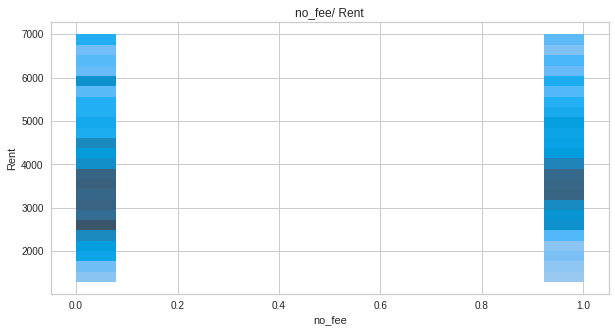

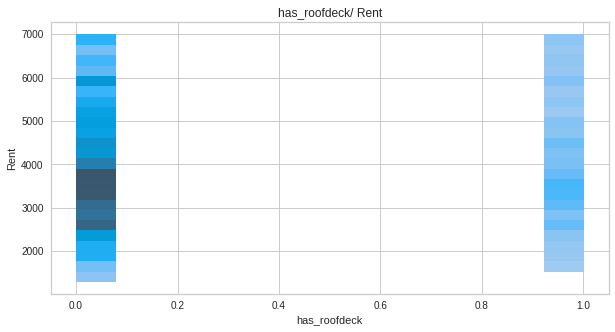

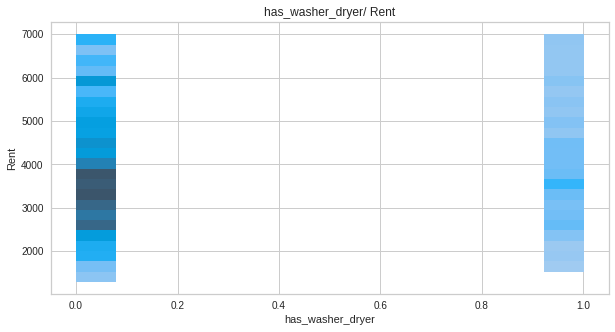

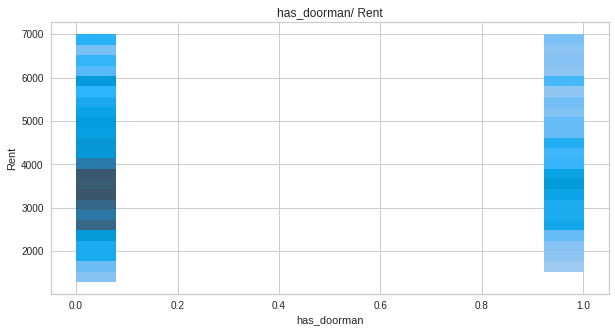

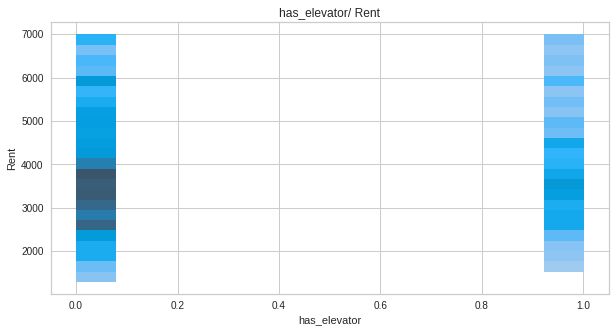

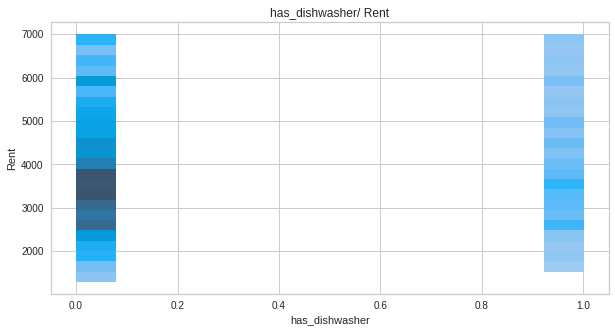

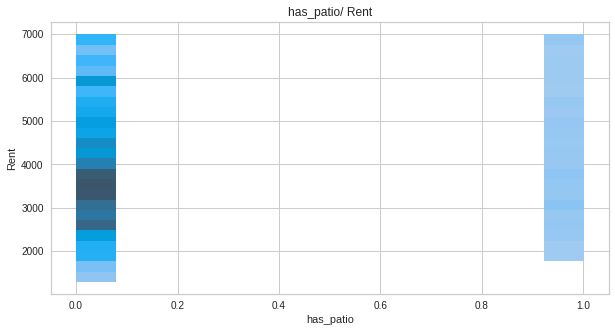

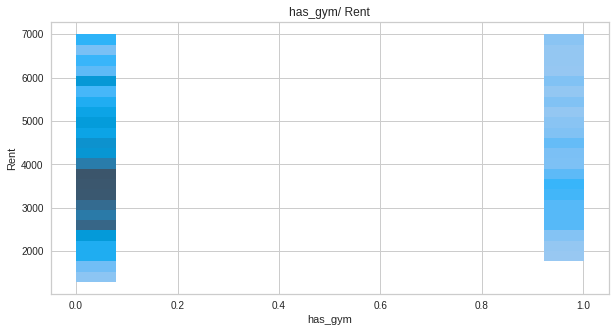

In [ ]:
# file.plot(kind = 'hist', x = x, y = y)
for i in manhattan_groups:

  fig,ax = plt.subplots(1,1,figsize=(10,5))
  sns.histplot(data=manhattan_groups, x=i,y='rent', kde=True).set_title(i +'/ Rent')
  plt.xlabel(i)
  plt.ylabel("Rent")
  plt.show()

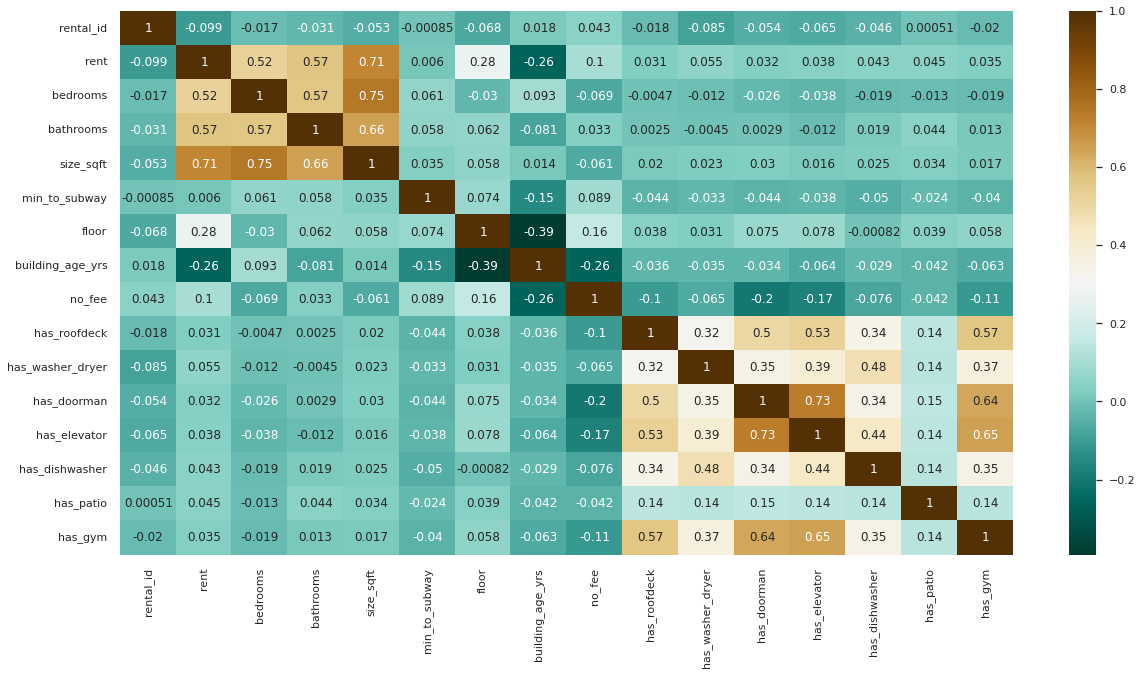

In [ ]:
## **Plot Correlations**
corr_matrix=manhattan_low.corr()
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
sns.heatmap(corr_matrix,annot=True,cmap='BrBG_r',annot_kws={"fontsize":12})

In [ ]:
manhattan_groups.info()
manhattan_groups.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 0 to 3538
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rent              2886 non-null   int64  
 1   bedrooms          2886 non-null   float64
 2   bathrooms         2886 non-null   int64  
 3   size_sqft         2886 non-null   int64  
 4   min_to_subway     2886 non-null   int64  
 5   floor             2886 non-null   float64
 6   building_age_yrs  2886 non-null   int64  
 7   no_fee            2886 non-null   int64  
 8   has_roofdeck      2886 non-null   int64  
 9   has_washer_dryer  2886 non-null   int64  
 10  has_doorman       2886 non-null   int64  
 11  has_elevator      2886 non-null   int64  
 12  has_dishwasher    2886 non-null   int64  
 13  has_patio         2886 non-null   int64  
 14  has_gym           2886 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 425.3 KB


,count,mean,std,min,25%,50%,75%,max
rent,2886.0,3900.749827,1264.939319,1300.0,2992.75,3675.0,4700.00,6996.0
bedrooms,2886.0,1.107415,0.829838,0.0,1.00,1.0,2.00,5.0
bathrooms,2886.0,1.171171,0.390281,0.0,1.00,1.0,1.00,3.0
size_sqft,2886.0,773.800416,274.927432,250.0,594.00,720.0,907.25,3000.0
min_to_subway,2886.0,4.883576,4.869061,0.0,2.00,4.0,6.00,43.0
floor,2886.0,11.249134,10.298153,0.0,4.00,7.5,16.00,81.0
building_age_yrs,2886.0,53.238046,38.907612,0.0,16.00,42.0,90.00,180.0
no_fee,2886.0,0.434165,0.495733,0.0,0.00,0.0,1.00,1.0
has_roofdeck,2886.0,0.151767,0.358857,0.0,0.00,0.0,0.00,1.0
has_washer_dryer,2886.0,0.153500,0.360531,0.0,0.00,0.0,0.00,1.0


In [ ]:
# select columns for regression model
# 1 label
y = manhattan_groups[['rent']]

# 5 features plus areas
x =manhattan_groups[[
  'bedrooms',
  'bathrooms',
  'size_sqft',
  'floor',
  'building_age_yrs',
  'Area_Central Park',
  'Area_Lower Manhattan',
  'Area_Midtwon',
  'Area_Queens',
  'Area_Roosevelt Island',
  'Area_Upper Manhattan',
  'Area_Village'
]]
print(y.shape)
print(x.shape)

In [ ]:
mg_train, mg_test=  split(manhattan_groups,test_size=0.2,random_state=123456)
Xg = mg_train.drop(['rent'], axis=1)
Yg = mg_train['rent']
model_lin = LinearRegression().fit(Xg, Yg)
model_tree =  DecisionTreeRegressor(max_leaf_nodes=20).fit(Xg, Yg)
model_knn =  KNeighborsRegressor(n_neighbors=3).fit(Xg,Yg)

In [ ]:
mg_train['rent_pred_lin'] = model_lin.predict(Xg)
mg_train['rent_pred_knn'] = model_knn.predict(Xg)
mg_train['rent_pred_tree'] = model_tree.predict(Xg)
mg_train.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,rent_pred_lin,rent_pred_knn,rent_pred_tree
1100,2999,0.0,1,560,4,9.0,9,0,0,0,1,0,0,0,0,3362.682419,3813.666667,2981.411017
37,3625,1.0,1,650,43,19.0,14,1,0,0,0,0,0,0,0,3288.201209,3623.333333,4132.311688
351,5500,1.0,2,934,2,18.0,29,0,0,0,0,0,1,1,0,4963.108852,4900.000000,5346.056180
2232,3800,1.0,1,633,6,25.0,28,0,0,0,0,0,0,0,0,3752.838504,3450.000000,3699.083019
1943,2600,0.0,1,517,2,2.0,28,1,0,0,0,0,0,0,0,3186.934259,3298.666667,2981.411017


In [ ]:
rmse = np.sqrt(mean_squared_error(mg_train['rent'],
                                  mg_train['rent_pred_lin']))
print("Linear RMSE = {:.4f}".format(rmse))

Linear RMSE = 788.8907


In [ ]:
rmspe = np.sqrt(np.mean(np.square(((mg_train['rent'] - mg_train['rent_pred_lin']) / mg_train['rent'])*100), axis=0))
print("Linear RMSPE = {:.4f}%".format(rmspe))

Linear RMSPE = 22.8766%


In [ ]:
mg_train['rent_pred_tree'] = model_tree.predict(Xg)
rmse_tree = np.sqrt(mean_squared_error(mg_train['rent'],
                                  mg_train['rent_pred_tree']))
print("Tree RMSE = {:.4f}".format(rmse_tree))
rmspe_tree = np.sqrt(np.mean(np.square(((mg_train['rent'] - mg_train['rent_pred_tree']) / mg_train['rent'])*100), axis=0))
print("Tree RMSPE = {:.4f}%".format(rmspe_tree))

Tree RMSE = 739.1117
Tree RMSPE = 22.0434%


In [ ]:
mg_train['rent_pred_knn'] = model_knn.predict(Xg)
rmse_knn = np.sqrt(mean_squared_error(mg_train['rent'],
                                  mg_train['rent_pred_knn']))
print("KNN RMSE = {:.4f}".format(rmse_knn))
rmspe_knn = np.sqrt(np.mean(np.square(((mg_train['rent'] - mg_train['rent_pred_knn']) / mg_train['rent'])*100), axis=0))
print("KNN RMSPE = {:.4f}%".format(rmspe_knn))

KNN RMSE = 577.9032
KNN RMSPE = 16.5900%


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


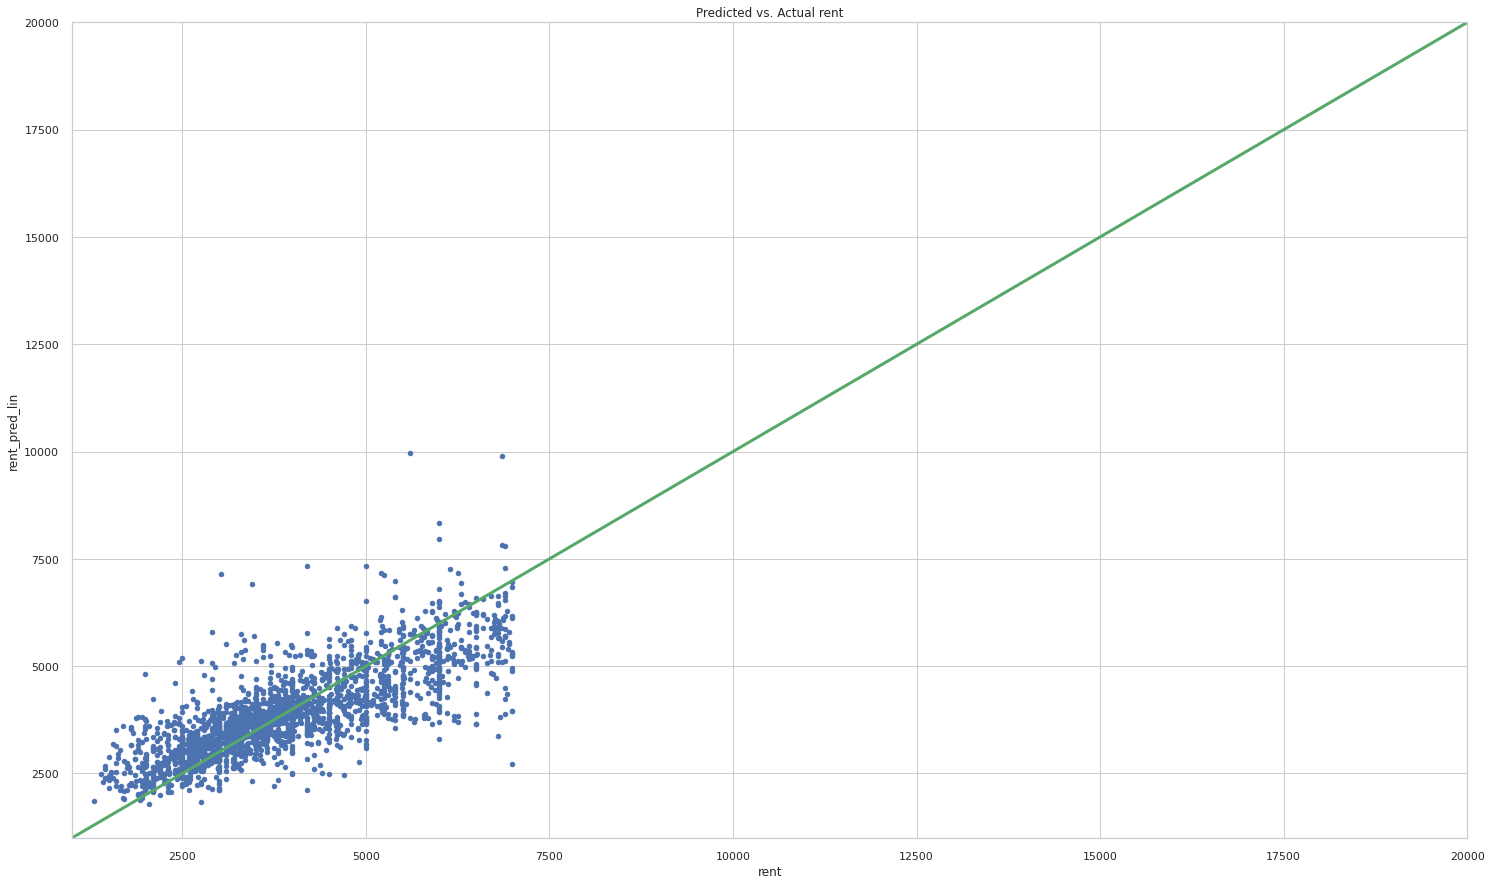

In [ ]:
ax = mg_train.plot('rent', 'rent_pred_lin', kind='scatter',
                 xlim=[1000, 20000], ylim=[1000, 20000],
                 title='Predicted vs. Actual rent')
ax.plot(np.linspace(1000, 20000, 2), np.linspace(1000, 20000, 2),
        linewidth=3, color='g')

In [ ]:
mt_train, mt_test=  split(manhattan_targeting,test_size=0.2,random_state=123456)
Xt = mt_train.drop(['rent','neighborhood'], axis=1)
Yt = mt_train['rent']
model_t = LinearRegression().fit(Xt, Yt)
mt_train['rent_pred'] = model_t.predict(Xt)
mt_train=mt_train[['rent','rent_pred','neighborhood_encoded']]
mt_train.head()

,rent,rent_pred,neighborhood_encoded
2172,3425,3441.521505,4125.996815
2219,5700,6622.472907,5354.050086
343,3800,4113.887095,5968.961538
1531,8657,10634.193893,5519.004000
262,3935,4013.207201,5354.050086


In [ ]:
rmse = np.sqrt(mean_squared_error(mt_train['rent'],
                                  mt_train['rent_pred']))
print("RMSE = {:.4f}".format(rmse))

In [ ]:
ax = mt_train.plot('rent', 'rent_pred', kind='scatter',
                 xlim=[1000, 20000], ylim=[1000, 20000],
                 title='Predicted vs. Actual rent')
ax.plot(np.linspace(1000, 20000, 2), np.linspace(1000, 20000, 2),
        linewidth=3, color='g')

In [ ]:
def evaluation(y, predictions):
    mae = mean_absolute_error(Yg, predictions)
    mse = mean_squared_error(Yg, predictions)
    rmse = np.sqrt(mean_squared_error(Yg, predictions))
    r_squared = r2_score(Yg, predictions)
    return mae, mse, rmse, r_squared

In [ ]:
# # create a lasso regressor
# lasso = Lasso(alpha=0.001, normalize=True)

# # Fit the regressor to the data
# lasso.fit(x,y)

# # Compute and print the coefficients
# lasso_coef = lasso.coef_
# print(lasso_coef)

# y_predicted = lasso.predict(x)

# # plot 
# fig=plt.figure()
# ax=fig.add_axes([0,0,1,1])
# ax.scatter(x= x[:,1], y= y  , color='r')
# ax.scatter(x= x[:,1], y= y_predicted, color='b')
# plt.show()

In [ ]:
lasso = Lasso(alpha=0.001, normalize=True)
lasso.fit(Xg, Yg)
predictions = lasso.predict(Xg)
lasso_coef = lasso.coef_
y_predicted = lasso.predict(Xg)
mae, mse, rmse, r_squared = evaluation(Yg, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print(lasso_coef)


MAE: 579.8793123606254
MSE: 622348.546337806
RMSE: 788.8907062057494
R2 Score: 0.6211055614417109
[ 53.86339161 444.22993137   2.73939583 -17.96733585  19.50426008
  -6.32499219 182.43339678  43.75229027 108.0735069   19.21788476
 -19.94000917  13.70783081  -1.23404481 -58.71846641]


In [ ]:
fig=plt.figure()

ax.scatter(x= Xg, y= Yg  , color='r')
ax.scatter(x= Xg, y= y_predicted, color='b')
plt.show()

ValueError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
# Use scikit-learn’s train_test_split() method to split x into 80% training set and 20% testing set
# x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=12345)

# print(x_train.shape)
# print(x_test.shape)
 
# print(y_train.shape)
# print(y_test.shape)

In [ ]:
# create linear regression model
# mlr = LinearRegression()

# fit model
# mlr.fit(x_train, y_train)

# predict y-values
# y_predict = mlr.predict(x_train)  #? x_test >> train 

# model = LinearRegression().fit(x,y)
# model

In [ ]:
# print our apartment features
# print(x.columns)

In [ ]:
# print("The model intercept is: {}".format(mlr.intercept_))
# print("The model coefficients are: {}".format(mlr.coef_))

In [ ]:
# team_apartment = [[3, 2, 820, 5, 10,1,0,0,0,0,0,0]]
# predict = mlr.predict(team_apartment)
# print("Predicted rent: $%.2f" % predict)

In [ ]:
# model.intercept_,model.coef_

In [ ]:
# manhattan_groups['rent_predict'] = mlr.predict(x)
# manhattan_groups.head()

In [ ]:
#create linear regression model
mlr = LinearRegression()

#fit model
# mlr.fit(x_train, y_train)
# y_train_pred = mlr.predict(x_train)

In [ ]:
# y_predict = mlr.predict(x)

In [ ]:
# rmse = np.sqrt(mean_squared_error(manhattan_groups['rent'],
#                                   manhattan_groups['rent_predict']))
# print("RMSE = {:.4f}".format(rmse))

In [ ]:
manhattan_groups = manhattan.drop(['rental_id','neighborhood', 'borough'],axis=1, inplace=False)
manhattan_groups =  pd.get_dummies(manhattan_groups)
manhattan_groups.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1


In [ ]:
X = manhattan_groups.drop('rent', axis=1)
y = manhattan_groups['rent']

rent_reg = LinearRegression().fit(X, y)
manhattan_groups['rent_predict_group'] = rent_reg.predict(X)
manhattan_groups.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,rent_predict_group
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,2840.528303
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,10383.280082
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,5821.123999
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,5032.578704
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,23828.222442


In [ ]:
# Use scikit-learn’s train_test_split() method to split x into 80% training set and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=12345)
rent_reg = LinearRegression().fit(X, y)
y_predict = rent_reg.predict(X_train)
rmse = np.sqrt(mean_squared_error(manhattan_groups['rent_predict_group'],
                   manhattan_groups['rent']))
print("RMSE = {:.2f}".format(rmse))

RMSE = 1485.62


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


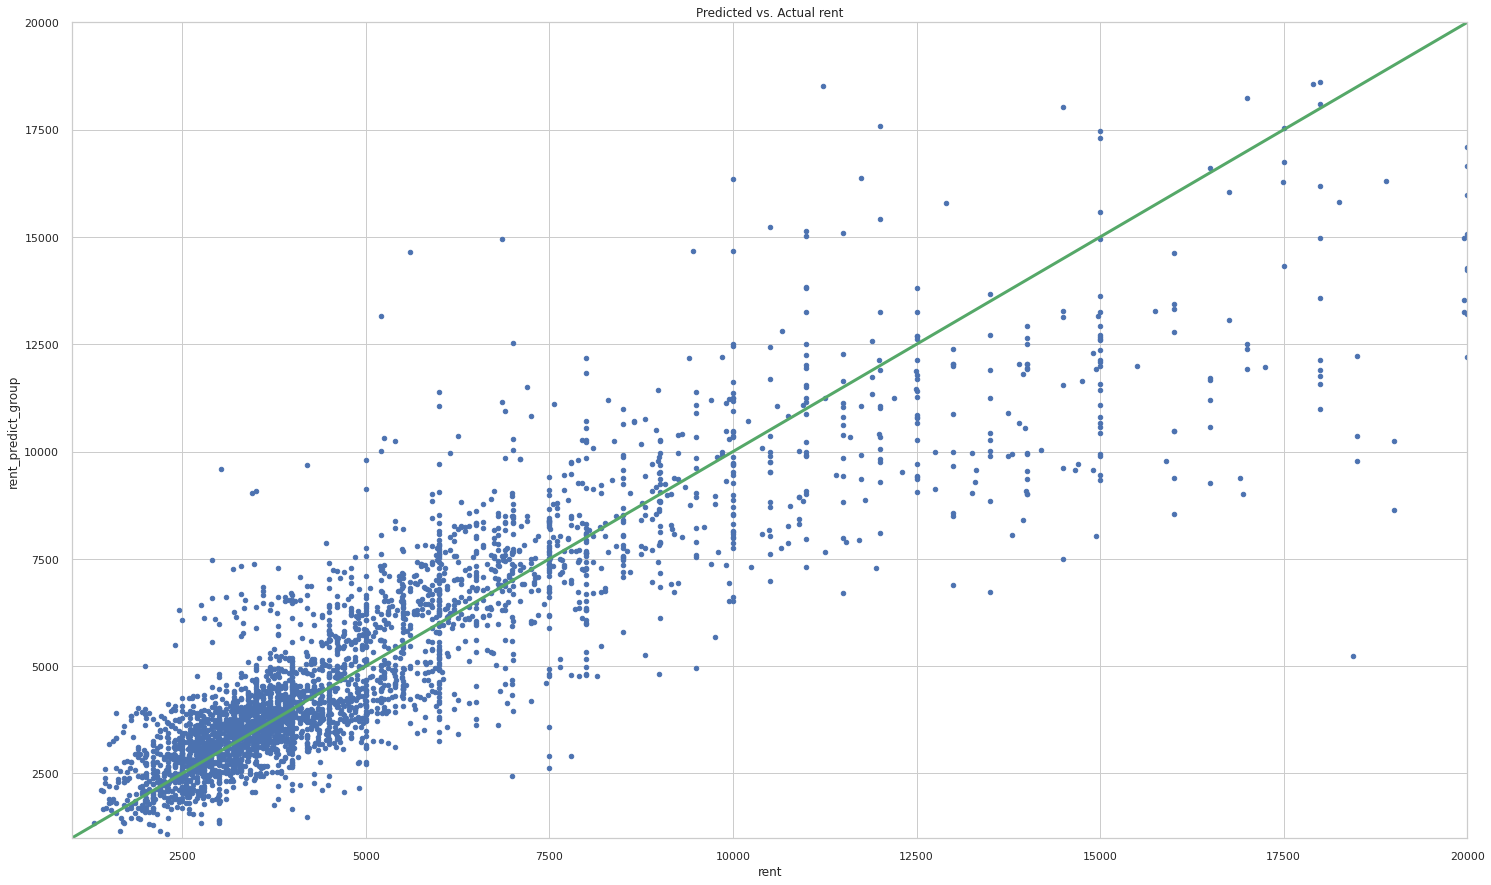

In [ ]:
ax = manhattan_groups.plot('rent', 'rent_predict_group', kind='scatter',
                 xlim=[1000, 20000], ylim=[1000, 20000],
                 title='Predicted vs. Actual rent')
ax.plot(np.linspace(1000, 20000, 2), np.linspace(1000, 20000, 2),
        linewidth=3, color='g')
# plt.rcParams["figure.figsize"] = [25, 15]



In [ ]:
y_train.shape

In [ ]:
# using correlation matrix between ares, nearest features and price rent up to $7000 let's build more clear model

In [ ]:
manhattan_low=manhattan_groups
manhattan_low = manhattan.loc[(manhattan['rent']<7000)]
manhattan_low=manhattan_low.drop(['rental_id','neighborhood', 'borough'],axis=1, inplace=False)
manhattan_low['features']=manhattan_low['bedrooms']*manhattan_low['bathrooms']*manhattan_low['size_sqft']
#manhattan_low=manhattan_low.loc[(manhattan_low['features']>0)]
#manhattan_low=manhattan_low.drop(['bedrooms','bathrooms', 'size_sqft'],axis=1, inplace=False)
manhattan_low.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,features
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,0.0
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,916.0
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,975.0
5,3800,3.0,2,1100,3,5.0,101,0,0,0,0,0,0,0,0,6600.0
6,1995,0.0,0,600,6,1.0,115,0,0,0,0,0,0,0,0,0.0


In [ ]:
Xl_new = manhattan_low.drop('rent', axis=1)
yl_new = manhattan_low['rent']

rent_reg_new = LinearRegression().fit(Xl_new, yl_new)
manhattan_low['rent_predict'] = rent_reg_new.predict(Xl_new)
manhattan_low.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,features,rent_predict
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,0.0,2921.376704
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,916.0,5132.207467
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,975.0,4519.636891
5,3800,3.0,2,1100,3,5.0,101,0,0,0,0,0,0,0,0,6600.0,4618.900697
6,1995,0.0,0,600,6,1.0,115,0,0,0,0,0,0,0,0,0.0,1519.571899


In [ ]:
# Use scikit-learn’s train_test_split() method to split x into 80% training set and 20% testing set
Xl_new_train, Xl_new_test, yl_new_train, yl_new_test = train_test_split(Xl_new,yl_new, train_size=0.8, test_size=0.2, random_state=12345)
rent_reg = LinearRegression().fit(Xl_new, yl_new)
y_predict = rent_reg.predict(Xl_new_train)
rmse = np.sqrt(mean_squared_error(manhattan_low['rent_predict'],
                   manhattan_low['rent']))
print("RMSE = {:.2f}".format(rmse))

RMSE = 753.87


In [ ]:
# run a residual analysis to assess the accuracy of our multiple linear regression model
residuals = y_predict - y_test
 
plt.scatter(y_predict, residuals, alpha=0.4)
plt.title('Residual Analysis')
 
plt.show()

In [ ]:
X_T = manhattan_groups.drop('rent', axis=1)
y_T = manhattan_groups['rent']
rent_tree = DecisionTreeRegressor(max_leaf_nodes=10).fit(X_T, y_T)

In [ ]:
import pydot
dot_data = export_graphviz(rent_tree,  feature_names=X.columns, leaves_parallel=True)  
graph = pydot.graph_from_dot_data(dot_data)[0]  
Image(graph.create_png(), width=750) 

In [ ]:
class Apartment:
  def __init__(self, bedrooms: float, bathrooms: int, size_sqft:float, floor:int, building_age_yrs:int, area:str ):
    self.bedrooms = bedrooms
    self.bathrooms = bathrooms
    self.size_sqft = size_sqft
    self.floor = floor
    self.building_age_yrs = building_age_yrs
    self.area = []

  def add_area(self,area): 
    self.area.append(area)

  def rent_pred(self):
    if self.bedrooms is None: 
      print('Please enter number of bedrooms')
    elif self.bathrooms is None:
      pass
    elif self.size_sqft is None:
      pass
    elif self.floor is None:
      pass
    elif self.building_age_yrs is None:
      pass
    elif add_area is None:
      pass  
    predict = mlr.predict(rent_pred)
    print("Predicted rent: $%.2f" % predict)

In [ ]:
my_apartment = Apartment(3,1,None, 10,10,'Area_Central Park')

In [ ]:
class Rent_Prediction:
  def __init__(self, file= "manhattan.csv"):
    self.df = pd.read_csv(file)
    self.linear_reg = LinearRegression()
  areas =  ['Central Park', 'Lower Manhattan', 'Midtwon','Queens','Roosevelt Island','Upper Manhattan','Village']
  conditions = [manhattan['neighborhood'].isin(['Central Park South','Upper East Side','Upper West Side']),
             manhattan['neighborhood'].isin(['Battery Park City','Chinatown','Financial District','Little Italy','Tribeca']),
              manhattan['neighborhood'].isin(['Chelsea','Flatiron','Gramercy Park','Lower East Side','Midtown','Midtown East','Midtown South','Midtown West']),
              manhattan['neighborhood'].isin(['Long Island City']),
              manhattan['neighborhood'].isin(['Roosevelt Island']),
              manhattan['neighborhood'].isin(['Central Harlem','East Harlem','Hamilton Heights','Inwood','Manhattanville','Morningside Heights','Washington Heights','West Harlem']),
              manhattan['neighborhood'].isin(['East Village','Greenwich Village','Nolita','Soho','Stuyvesant Town/PCV','West Village'])             
             ] 
  def file_bygroup(self):
    self.df = file['Area'] = np.select(conditions,areas)
  def split(self, test_size):
        X = np.array(self.df[['Humidity', 'Pressure (millibars)']])
        y = np.array(self.df['Temperature (C)'])
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size = test_size, random_state = 42)